# <u>TP1 - Trajectoire d'un modèle à n étapes</u>

In [48]:
import numpy as np

n = 100 # nombre d'étapes
T = 1 # temps final
deltat = T/n # pas de temps
S0 = 120 # prix initial
sigma = 0 # volatilité
up = 1.5# up
down = 0.5 # down

print("sigma = {}, u = {}, down = {}".format(sigma,up,down))

sigma = 0, u = 1.5, down = 0.5


In [49]:
# matrice des prix de l'actif
def CRR(n,down,up,S0):
    S = np.zeros((n+1,n+1))
    S[0,0] = S0
    for i in range(n):
        S[i+1,0] = S[i,0]*down
        for j in range(i+1):
            S[i+1,j+1] = S[i,j]*up
    return S


In [50]:
S = CRR(n,down,up,S0)
S

array([[1.20000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.00000000e+01, 1.80000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+01, 9.00000000e+01, 2.70000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.78653235e-28, 1.13595970e-27, 3.40787911e-27, ...,
        2.16832628e+19, 0.00000000e+00, 0.00000000e+00],
       [1.89326617e-28, 5.67979852e-28, 1.70393956e-27, ...,
        1.08416314e+19, 3.25248942e+19, 0.00000000e+00],
       [9.46633086e-29, 2.83989926e-28, 8.51969778e-28, ...,
        5.42081570e+18, 1.62624471e+19, 4.87873413e+19]])

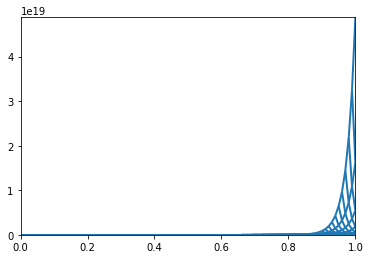

In [51]:
# librairies graphiques
import matplotlib.pyplot as plt
import matplotlib.collections as mc

# liste des couples de points
lines = []
for i in range(n):
    for j in range(i+1):
        lines.append([(i*deltat,S[i,j]),((i+1)*deltat,S[i+1,j])])
        lines.append([(i*deltat,S[i,j]),((i+1)*deltat,S[i+1,j+1])])

# plot
lc = mc.LineCollection(lines, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,T)
ax.set_ylim(0,S.max()+20)
ax.add_collection(lc)
plt.show()

In [52]:
# trajectoires aléatoires sur cet arbre
M = 100 # nb de trajectoires
p = 0.6 # paramètre Bernoulli
A = ???????(1, p, (n,M)) # tirages aléatoires de M trajectoires de n étapes
J = ???????(A,axis=0) # nombre de up cumulatif
P = np.zeros((n+1,M)) # matrice des prix correspondants
for m in range(M):
    P[0,m] = ??
    for i in range(n):
        P[i+1,m] = ??


SyntaxError: invalid syntax (<ipython-input-52-9e6ade414ffb>, line 4)

In [ ]:
plt.plot(P)
plt.show()

In [ ]:
# histogramme des prix finaux
nclass = int(np.sqrt(M))
??????(P[n,:])